## Social_Network_Ads using KNN classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
data.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [64]:
X.shape

(400, 3)

In [6]:
y=data.iloc[:,-1].values

In [53]:
y.shape

(400,)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.31821081,  0.3961468 ],
       [ 0.78233335,  1.35474216],
       [-1.79560721,  0.16376004],
       [-1.41369009,  0.33805011],
       [ 0.11397839,  0.07661501],
       [-1.31821081, -0.44625519],
       [ 0.78233335, -0.33006181],
       [ 2.02356399,  0.51234017],
       [-0.26793873,  0.04756666],
       [ 2.02356399,  0.16376004],
       [ 2.02356399, -1.20151214],
       [-0.74533513,  0.27995342],
       [-0.26793873, -0.27196512],
       [-0.36341801,  1.29664547],
       [-1.70012793,  0.33805011],
       [ 0.01849911, -0.15577175],
       [-0.26793873, -0.44625519],
       [-0.07698017,  0.27995342],
       [ 0.78233335, -1.23056049],
       [ 0.40041623, -0.15577175],
       [ 0.87781263, -1.1724638 ],
       [ 0.20945767, -0.3881585 ],
       [-1.22273153, -1.08531877],
       [ 0.87781263,  2.13904746],
       [-0.93629369, -0.44625519],
       [-0.26793873, -1.25960883],
       [ 0.11397839, -0.27196512],
       [ 0.87781263, -1.05627042],
       [-0.07698017,

In [13]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.5798907 , -1.52000699],
       [-1.63423743,  0.20788728],
       [ 2.19975068, -0.77948087],
       [-0.10064219, -0.47092833],
       [-0.3881913 , -0.50178358],
       [ 0.37860633,  0.11532151],
       [ 0.95370454, -0.50178358],
       [ 0.76200514, -1.39658597],
       [-0.5798907 ,  0.26959779],
       [-1.73008714, -1.27316495],
       [-0.3881913 , -0.22408629],
       [ 2.10390098,  2.33689985],
       [-0.5798907 ,  1.56551849],
       [ 0.28275662,  0.14617677],
       [-0.19649189,  0.36216355],
       [-1.34668832, -1.45829648],
       [-1.73008714, -1.3040202 ],
       [-0.86743981,  1.71979476],
       [ 0.85785484,  0.88670288],
       [-0.77159011,  0.48558457],
       [ 1.81635187, -0.22408629],
       [ 1.43295306,  2.55288664],
       [ 1.14540395, -0.06981001],
       [ 2.10390098, -0.77948087],
       [-0.6757404 ,  0.36216355],
       [ 0.09105722, -0.50178358],
       [ 1.52880276,  0.45472932],
       [ 1.24125365, -0.71777036],
       [-0.77159011,

In [14]:
# 1st method of finding k
np.sqrt(X_train.shape[0])

17.88854381999832

In [15]:
k = 17

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

### Train our model

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
y_pred.shape

(80,)

In [20]:
y_test.shape

(80,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[50,  7],
       [ 2, 21]], dtype=int64)

In [23]:
# 2nd method of k

In [24]:

accuracy = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [25]:
len(accuracy)

25

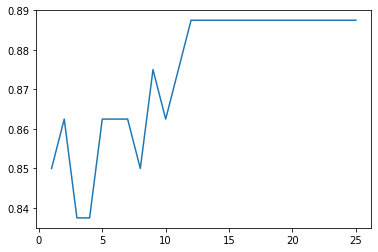

In [26]:
plt.plot(range(1,26),accuracy)

In [40]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [41]:
y_pred = knn.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.8875

In [38]:
def predict_output():
    age= int(input("Enter the age "))
    salary= int(input("Enter the salary "))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0] == 0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [39]:
predict_output()

Enter the age 20
Enter the salary 400000


'Will purchase'